In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# Computing the Cost Function
Fill in the the `compute_cost` function below:

In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    

    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE / MAE
    # ***************************************************
    return 1/len(y) *(y-tx@ w).T @ (y-tx@ w)

w=[1,2]
compute_loss(y,tx,w)

5388.9667317741687

# Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    

    losses = np.zeros((len(w0), len(w1)))
    
    for i in range (0,len(w0)):
        for j in range (0,len(w1)):
            losses[i,j]=compute_loss(y,tx,[w0[i],w1[j]])
    
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=84.84896629356497, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.017 seconds


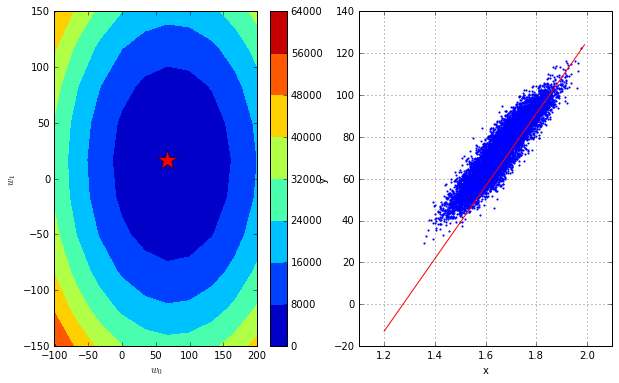

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization
import datetime

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    
    
    N=len(y)
    
    gradient=-1/N * (tx.T)  @ (y-tx@ w)
    return gradient

compute_gradient(y,tx,[75,15])

array([ 1.706078  ,  1.52028757])

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma): 
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        
        loss=compute_loss(y,tx,w)
        gradient=compute_gradient(y,tx,w)
        
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        
        
        w=w-gamma*gradient
        
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([100.0, 10.0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=756.0947763975178, w0=97.32939220021052, w1=10.34797124349891
Gradient Descent(1/49): loss=618.2834062721447, w0=94.92584518039999, w1=10.661145362647925
Gradient Descent(2/49): loss=506.65619647059236, w0=92.7626528625705, w1=10.94300206988204
Gradient Descent(3/49): loss=416.2381565313348, w0=90.81577977652397, w1=11.196673106392744
Gradient Descent(4/49): loss=342.9995441805362, w0=89.06359399908209, w1=11.424977039252378
Gradient Descent(5/49): loss=283.6762681763894, w0=87.4866267993844, w1=11.630450578826046
Gradient Descent(6/49): loss=235.62441461303052, w0=86.06735631965647, w1=11.815376764442348
Gradient Descent(7/49): loss=196.7024132267097, w0=84.79001288790134, w1=11.98181033149702
Gradient Descent(8/49): loss=165.17559210379002, w0=83.64040379932173, w1=12.131600541846222
Gradient Descent(9/49): loss=139.63886699422522, w0=82.60575561960007, w1=12.266411731160506
Gradient Descent(10/49): loss=118.95411965547754, w0=81.67457225785058, w1=12.387

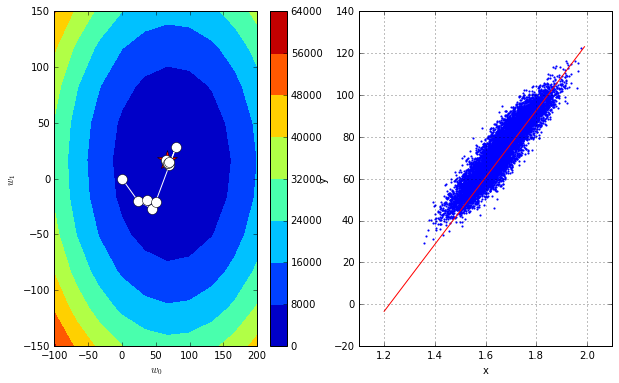

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient for batch data."""
    
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.
    # ***************************************************
    

    stoch_gradient=compute_gradient(y,tx,w)
    loss=compute_loss(y,tx,w)
    return stoch_gradient,loss


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient descent.
    # ***************************************************
    
    
    w=initial_w
    ws=[initial_w]
    losses=[]
    
    for n_iter in range(max_iters):
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            stoch_gradient,loss=compute_stoch_gradient(minibatch_y,minibatch_tx,w)
        w=w-gamma*stoch_gradient;
        ws.append(np.copy(w))
        losses.append(loss)
        
    return losses, ws

In [12]:
# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.4
batch_size = 1

# Initialization
w_initial = np.array([0.0, 0.0])

# Start SGD.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=4.907 seconds


<function __main__.plot_figure>

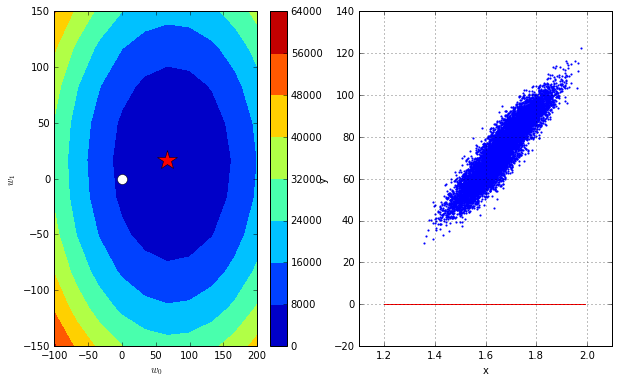

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))